BDA Proejct group

Using a non linear model

Using a Hierarchical model

Loading required package: Rcpp

Loading 'brms' package (version 2.22.6). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


New names:
• `% improv` -> `% improv...4`
• `% improv` -> `% improv...7`
• `% improv` -> `% improv...10`
• `% improv` -> `% improv...13`
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: Improvement ~ Group + (1 + Group | ImprovementType) 
   Data: data_long (Number of observations: 200) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~ImprovementType (Number of levels: 4) 
                            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                   2.17      2.11     0.10     7.83 1.00      975
sd(GroupFullROM)                2.55      2.37     0.10     7.95 1.00     1374
cor(Intercept,GroupFullROM)     0.09      0.57    -0.94     0.96 1.00     2191
                            Tail_ESS
sd(Intercept)                   1244
sd(GroupFullROM)                1691
cor(Intercept,GroupFullROM)     2119

Regression Coefficients:
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        5.51      1.59     1.27     8.11 1.00     1247      874
GroupFullROM   

Using 10 posterior draws for ppc type 'dens_overlay' by default.



Hypothesis Tests for class b:
          Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob
1 (GroupFullROM) < 0     0.32      1.29    -1.82     2.39       0.64      0.39
  Star
1     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

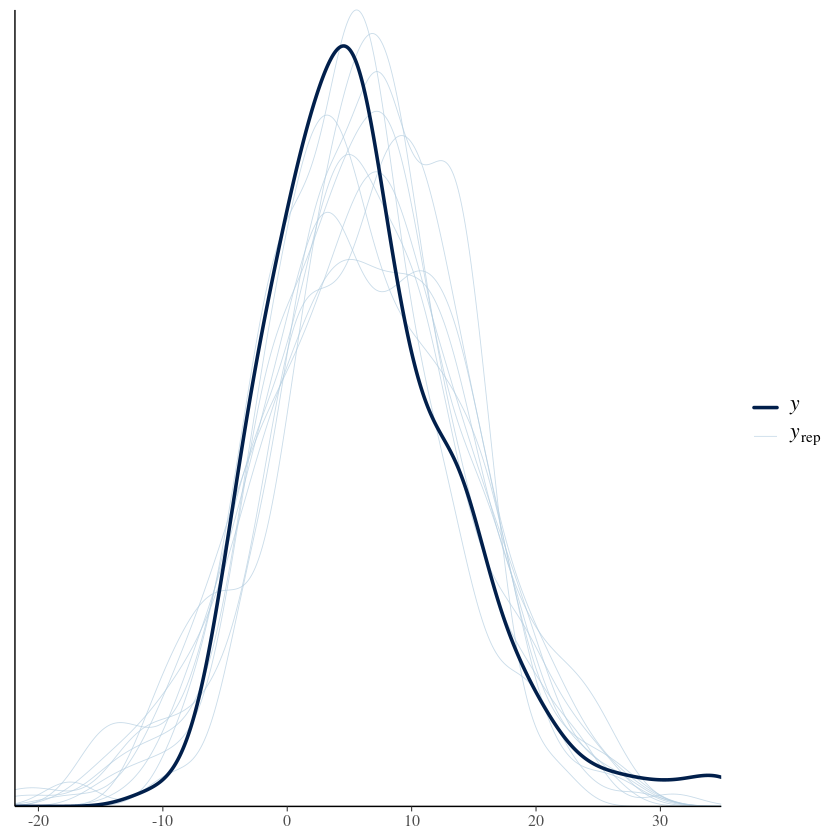

In [1]:
# Load necessary libraries
library(brms)
library(readxl)

# Load the data
data <- read_excel("/notebooks/Data Sheet.xlsx", sheet = "Muscle Thickness")

# Clean the GROUP column
data$GROUP <- ifelse(data$GROUP %in% c("1", "1 = pROM"), 1,
                     ifelse(data$GROUP %in% c("2", "2 = fROM"), 2, NA))

# Convert GROUP to a factor with appropriate labels
data$Group <- factor(data$GROUP, levels = c(1, 2), labels = c("Lengthened Partials", "Full ROM"))

# Gather improvement columns into long format for hierarchical modeling
library(tidyr)
data_long <- data %>%
  pivot_longer(cols = starts_with("% improv"),  # Adjust this to match all relevant improvement columns
               names_to = "ImprovementType", 
               values_to = "Improvement")

# Remove rows with missing values
data_long <- data_long[!is.na(data_long$Improvement), ]

# Define priors
priors <- c(
  set_prior("normal(0, 5)", class = "Intercept"),  # Prior for the overall intercept
  set_prior("normal(0, 2)", class = "b"),          # Prior for group-level coefficients
  set_prior("student_t(3, 0, 10)", class = "sd")   # Prior for random effects standard deviation
)

# Hierarchical Bayesian logistic regression model
model_hierarchical <- brm(
  Improvement ~ Group + (1 + Group | ImprovementType),  # Group-level effects for ImprovementType
  data = data_long,
  family = gaussian(),  # Use Gaussian if Improvement is continuous; switch to Bernoulli for binary outcomes
  prior = priors,
  control = list(adapt_delta = 0.95), 
  cores = 4
)

# Summary of the model
summary(model_hierarchical)

# Posterior predictive checks
pp_check(model_hierarchical)

# Hypothesis testing
hypothesis(model_hierarchical, "GroupFullROM < 0")


linear regression with all improv columns


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


New names:
• `% improv` -> `% improv...4`
• `% improv` -> `% improv...7`
• `% improv` -> `% improv...10`
• `% improv` -> `% improv...13`


tibble [200 × 12] (S3: tbl_df/tbl/data.frame)
 $ GROUP          : num [1:200] 1 1 1 1 1 1 1 1 1 1 ...
 $ BB55-Pre       : num [1:200] 39 39 39 39 45 ...
 $ BB55-Post      : num [1:200] 39 39 39 39 44.8 ...
 $ BB45-Pre       : num [1:200] 33.4 33.4 33.4 33.4 40.5 ...
 $ BB45-Post      : num [1:200] 35.3 35.3 35.3 35.3 42.5 ...
 $ TB55-Pre       : num [1:200] 41.3 41.3 41.3 41.3 34.3 ...
 $ TB55-Post      : num [1:200] 41.5 41.5 41.5 41.5 40.1 ...
 $ TB45-Pre       : num [1:200] 44.8 44.8 44.8 44.8 47.5 ...
 $ TB45-Post      : num [1:200] 44.9 44.9 44.9 44.9 50.7 ...
 $ Group          : Factor w/ 2 levels "Lengthened Partials",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ImprovementType: chr [1:200] "% improv...4" "% improv...7" "% improv...10" "% improv...13" ...
 $ Improvement    : num [1:200] 0 5.6835 0.5568 0.0669 -0.4227 ...


                     
                      % improv...10 % improv...13 % improv...4 % improv...7
  Lengthened Partials            25            25           25           25
  Full ROM                       25            25           25           25

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: Improvement ~ Group 
   Data: data_long (Number of observations: 200) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        5.92      0.73     4.51     7.34 1.00     3733     2856
GroupFullROM     0.69      1.08    -1.38     2.82 1.00     3568     2357

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     7.70      0.36     7.02     8.46 1.00     3543     2498

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Using 10 posterior draws for ppc type 'dens_overlay' by default.



Hypothesis Tests for class b:
          Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob
1 (GroupFullROM) < 0     0.69      1.08    -1.09     2.44       0.36      0.27
  Star
1     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

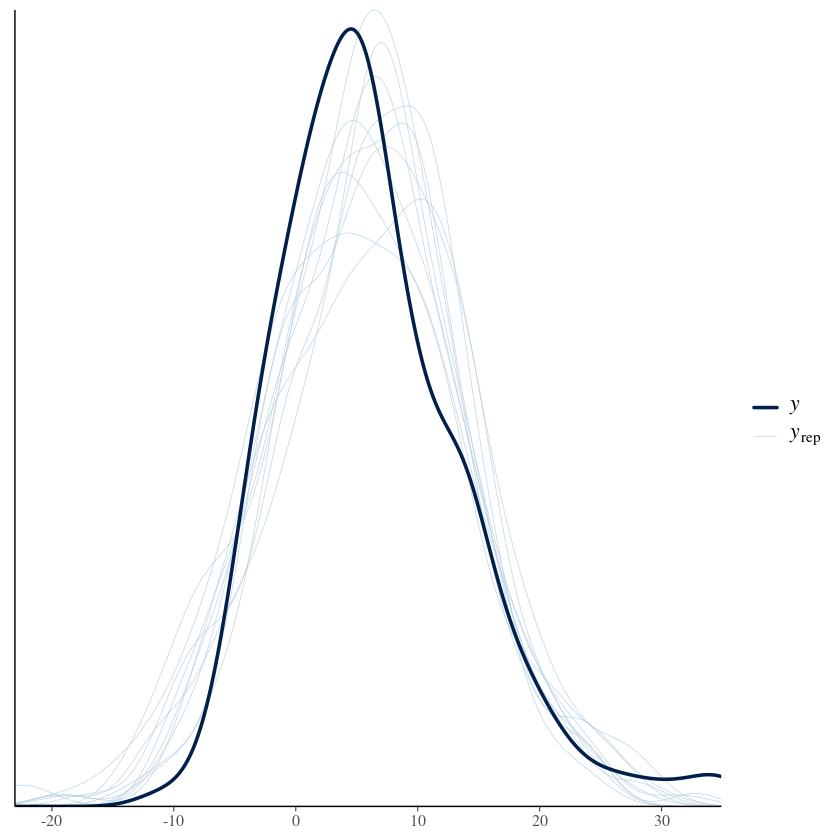

In [2]:
# Load necessary libraries
library(brms)
library(readxl)
library(tidyr)
library(dplyr)

# Load the data
data <- read_excel("/notebooks/Data Sheet.xlsx", sheet = "Muscle Thickness")

# Clean the GROUP column
data$GROUP <- ifelse(data$GROUP %in% c("1", "1 = pROM"), 1,
                     ifelse(data$GROUP %in% c("2", "2 = fROM"), 2, NA))

# Convert GROUP to a factor with appropriate labels
data$Group <- factor(data$GROUP, levels = c(1, 2), labels = c("Lengthened Partials", "Full ROM"))

# Reshape the data to long format to include all `% improv` columns
data_long <- data %>%
  pivot_longer(
    cols = starts_with("% improv"), 
    names_to = "ImprovementType", 
    values_to = "Improvement"
  ) %>%
  drop_na(Improvement)  # Remove rows with missing values in Improvement

# Verify the reshaped data
str(data_long)
table(data_long$Group, data_long$ImprovementType, useNA = "ifany")

# Define proper priors
priors <- c(
  set_prior("normal(0, 10)", class = "Intercept"), # Prior for the intercept
  set_prior("normal(0, 5)", class = "b"),         # Prior for coefficients
  set_prior("exponential(1)", class = "sigma")    # Prior for residual standard deviation
)

# Bayesian linear model with all improvement types
model_linear <- brm(
  Improvement ~ Group, 
  data = data_long, 
  family = gaussian(), 
  prior = priors, 
  control = list(adapt_delta = 0.95), 
  cores = 4
)

# Summary of the model
summary(model_linear)

# Posterior predictive checks
pp_check(model_linear)

# Hypothesis testing
hypothesis(model_linear, "GroupFullROM < 0")


Logistic regression: all improv columns

New names:
• `% improv` -> `% improv...4`
• `% improv` -> `% improv...7`
• `% improv` -> `% improv...10`
• `% improv` -> `% improv...13`


tibble [200 × 13] (S3: tbl_df/tbl/data.frame)
 $ GROUP             : num [1:200] 1 1 1 1 1 1 1 1 1 1 ...
 $ BB55-Pre          : num [1:200] 39 39 39 39 45 ...
 $ BB55-Post         : num [1:200] 39 39 39 39 44.8 ...
 $ BB45-Pre          : num [1:200] 33.4 33.4 33.4 33.4 40.5 ...
 $ BB45-Post         : num [1:200] 35.3 35.3 35.3 35.3 42.5 ...
 $ TB55-Pre          : num [1:200] 41.3 41.3 41.3 41.3 34.3 ...
 $ TB55-Post         : num [1:200] 41.5 41.5 41.5 41.5 40.1 ...
 $ TB45-Pre          : num [1:200] 44.8 44.8 44.8 44.8 47.5 ...
 $ TB45-Post         : num [1:200] 44.9 44.9 44.9 44.9 50.7 ...
 $ Group             : Factor w/ 2 levels "Lengthened Partials",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ImprovementType   : chr [1:200] "% improv...4" "% improv...7" "% improv...10" "% improv...13" ...
 $ Improvement       : num [1:200] 0 5.6835 0.5568 0.0669 -0.4227 ...
 $ MuscleGrowthBinary: num [1:200] 0 0 0 0 0 0 1 0 0 0 ...


, ,  = 0

                     
                      % improv...10 % improv...13 % improv...4 % improv...7
  Lengthened Partials            16            19           21           22
  Full ROM                       12            14           21           22

, ,  = 1

                     
                      % improv...10 % improv...13 % improv...4 % improv...7
  Lengthened Partials             9             6            4            3
  Full ROM                       13            11            4            3


Compiling Stan program...

Start sampling



 Family: bernoulli 
  Links: mu = logit 
Formula: MuscleGrowthBinary ~ Group 
   Data: data_long (Number of observations: 200) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       -1.27      0.25    -1.77    -0.81 1.00     2715     2024
GroupFullROM     0.46      0.33    -0.17     1.12 1.00     2804     2143

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

Using 10 posterior draws for ppc type 'dens_overlay' by default.



Hypothesis Tests for class b:
          Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob
1 (GroupFullROM) < 0     0.46      0.33    -0.07     1.02       0.09      0.08
  Star
1     
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.

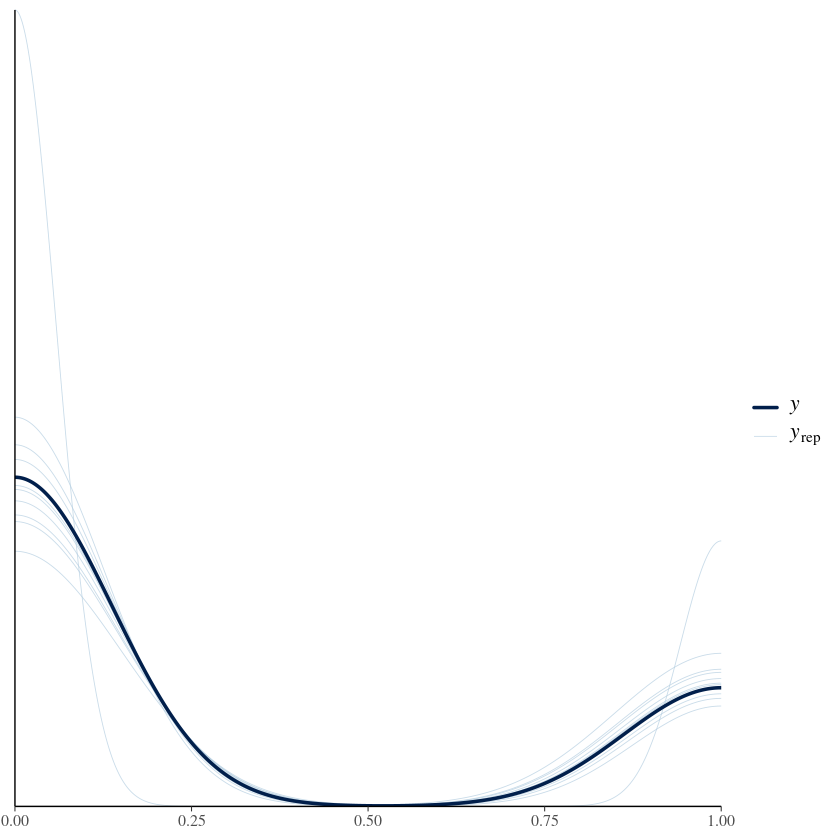

In [3]:
# Load necessary libraries
library(brms)
library(readxl)
library(tidyr)
library(dplyr)

# Load the data
data <- read_excel("/notebooks/Data Sheet.xlsx", sheet = "Muscle Thickness")

# Clean the GROUP column
data$GROUP <- ifelse(data$GROUP %in% c("1", "1 = pROM"), 1,
                     ifelse(data$GROUP %in% c("2", "2 = fROM"), 2, NA))

# Convert GROUP to a factor with appropriate labels
data$Group <- factor(data$GROUP, levels = c(1, 2), labels = c("Lengthened Partials", "Full ROM"))

# Reshape the data to long format to include all `% improv` columns
data_long <- data %>%
  pivot_longer(
    cols = starts_with("% improv"), 
    names_to = "ImprovementType", 
    values_to = "Improvement"
  ) %>%
  drop_na(Improvement)  # Remove rows with missing values in Improvement

# Define a binary outcome for success/failure based on a threshold
threshold <- 10  # Set an appropriate threshold
data_long <- data_long %>%
  mutate(MuscleGrowthBinary = ifelse(Improvement >= threshold, 1, 0))

# Verify the reshaped data
str(data_long)
table(data_long$Group, data_long$ImprovementType, data_long$MuscleGrowthBinary, useNA = "ifany")

# Define priors
priors <- c(
  set_prior("normal(0, 5)", class = "Intercept"),  # Prior for the intercept
  set_prior("normal(0, 2)", class = "b")          # Prior for coefficients
)

# Bayesian logistic regression model with all improvement types
model_logistic <- brm(
  MuscleGrowthBinary ~ Group, 
  data = data_long, 
  family = bernoulli(link = "logit"),  # Logistic regression
  prior = priors, 
  control = list(adapt_delta = 0.95), 
  cores = 4
)

# Summary of the model
summary(model_logistic)

# Posterior predictive checks
pp_check(model_logistic)

# Hypothesis testing
hypothesis(model_logistic, "GroupFullROM < 0")


In [4]:
# Load necessary libraries
library(brms)
library(loo)

# ... (Your model fitting code as provided)

# Calculate LOO-CV for each model
loo_hierarchical <- loo(model_hierarchical)
loo_linear <- loo(model_linear)
loo_logistic <- loo(model_logistic)

# Compare models using LOO-CV
loo_compare(loo_hierarchical, loo_linear, loo_logistic)

This is loo version 2.8.0.9000

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) for an entire session. 

Warning message:
“Not all models have the same y variable. ('yhash' attributes do not match)”


,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
model_logistic,0.0000,0.00000,-116.7169,6.592924,2.114646,0.1678443,233.4338,13.18585
model_hierarchical,-579.0790,12.92791,-695.7959,14.383669,7.304425,1.3415346,1391.5918,28.76734
model_linear,-580.0562,12.74313,-696.7731,14.294141,3.704251,0.8692761,1393.5461,28.58828


In [5]:
library(brms)
library(loo)



# Calculate LOO-CV for each model
loo_hierarchical <- loo(model_hierarchical)
loo_linear <- loo(model_linear)
loo_logistic <- loo(model_logistic)

# Compare models using LOO-CV, with linear model as reference
loo_compare(loo_linear, loo_hierarchical, loo_logistic, comp = TRUE)

ERROR: Error: All inputs should have class 'loo'.


In [6]:
loo_diag(loo_linear)
loo_diag(loo_hierarchical)
loo_diag(loo_logistic)

ERROR: Error in loo_diag(loo_linear): could not find function "loo_diag"


This is bayesplot version 1.11.1.9000

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting


Attaching package: ‘bayesplot’


The following object is masked from ‘package:brms’:

    rhat


Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”


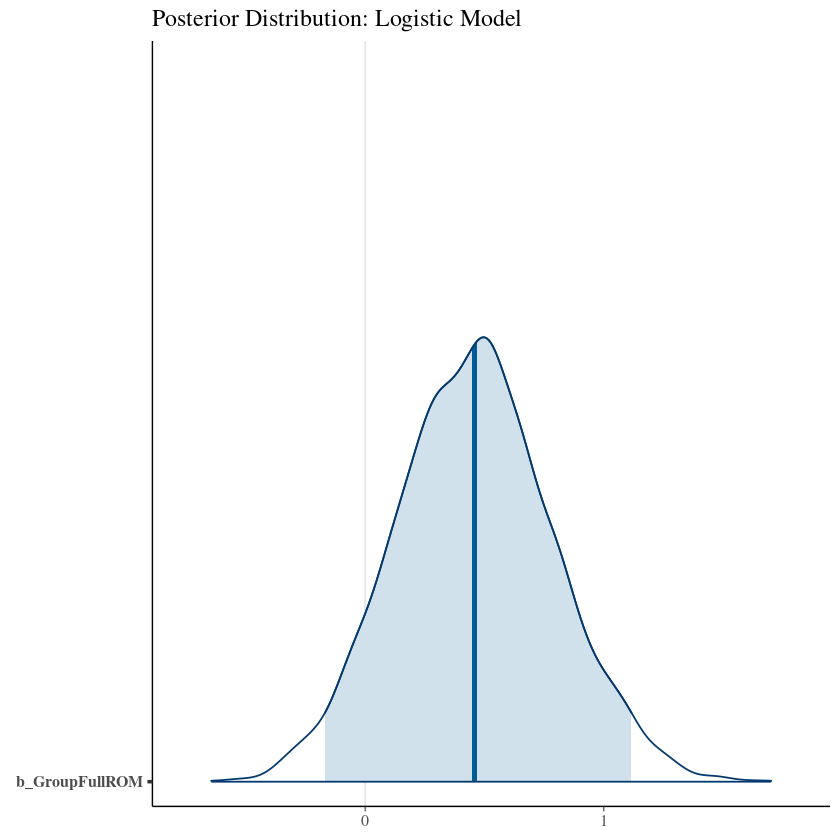

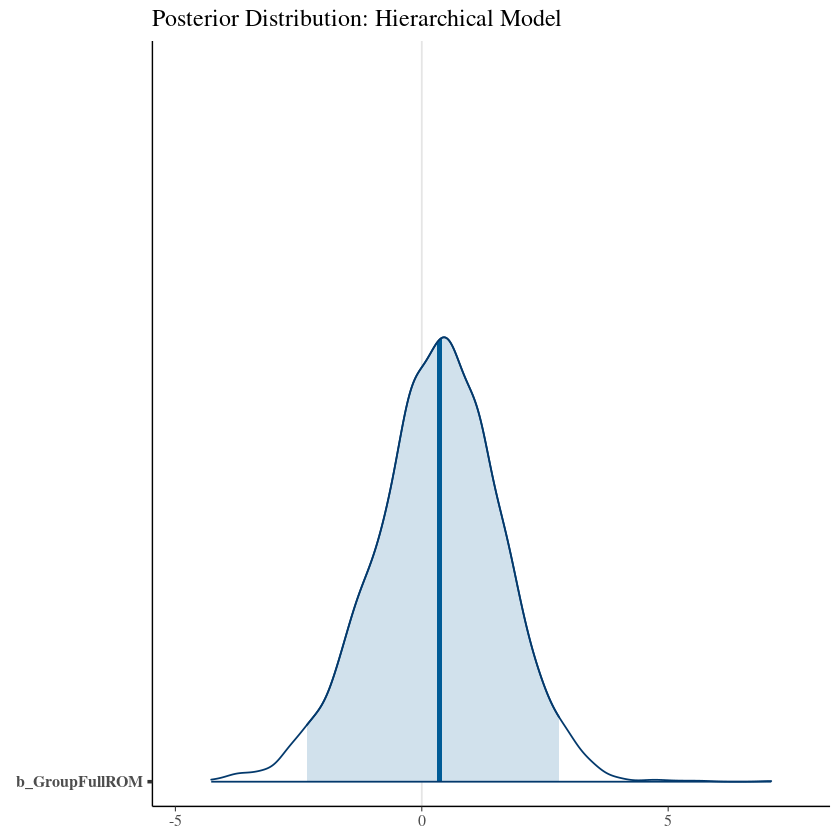

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


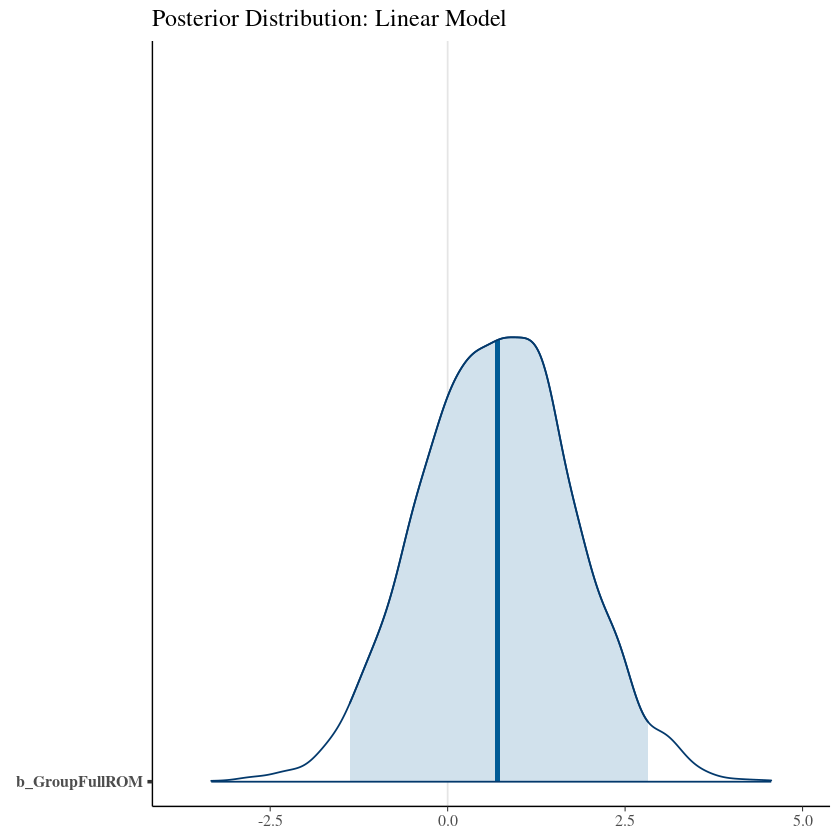

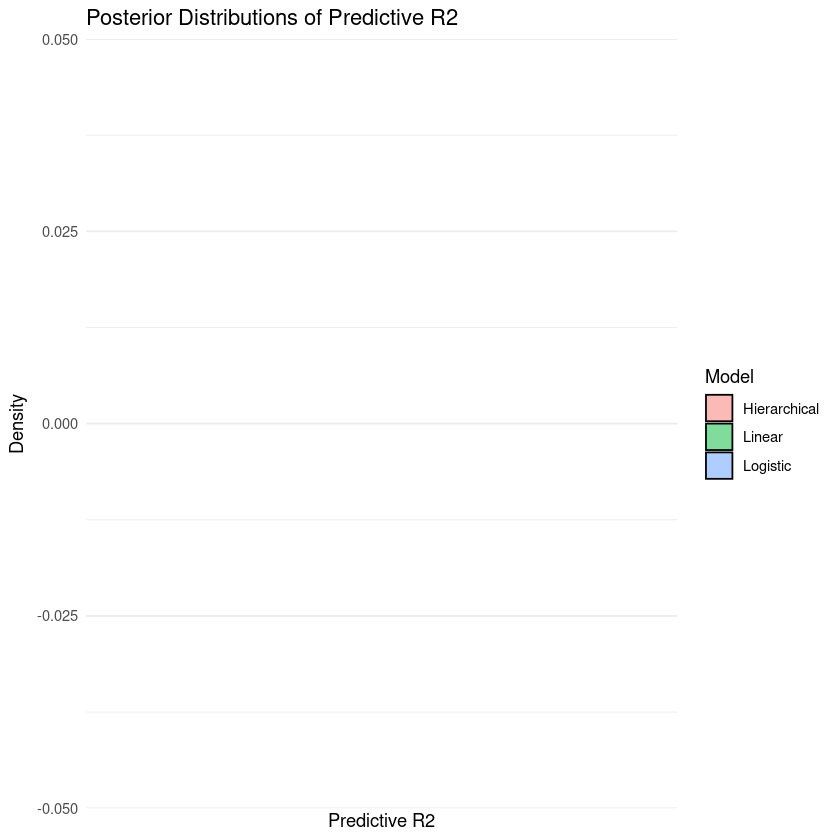

In [7]:
# Visualizing the posterior distributions of parameters
library(ggplot2)
library(bayesplot)

# Extract posterior samples for each model
posterior_logistic <- posterior_samples(model_logistic)
posterior_hierarchical <- posterior_samples(model_hierarchical)
posterior_linear <- posterior_samples(model_linear)

# Plot posterior distributions for a key parameter (e.g., b_GroupFullROM)
mcmc_areas(
  posterior_logistic, pars = "b_GroupFullROM", prob = 0.95
) + ggtitle("Posterior Distribution: Logistic Model")

mcmc_areas(
  posterior_hierarchical, pars = "b_GroupFullROM", prob = 0.95
) + ggtitle("Posterior Distribution: Hierarchical Model")

mcmc_areas(
  posterior_linear, pars = "b_GroupFullROM", prob = 0.95
) + ggtitle("Posterior Distribution: Linear Model")




# Compute predictive R2 for each model
r2_logistic <- bayes_R2(model_logistic)
r2_hierarchical <- bayes_R2(model_hierarchical)
r2_linear <- bayes_R2(model_linear)

# Extract posterior draws of R2 as data frames
r2_logistic_draws <- as.data.frame(r2_logistic)
r2_hierarchical_draws <- as.data.frame(r2_hierarchical)
r2_linear_draws <- as.data.frame(r2_linear)

# Combine the R2 distributions for comparison
r2_combined <- rbind(
  data.frame(Model = "Logistic", R2 = r2_logistic_draws$Estimate),
  data.frame(Model = "Hierarchical", R2 = r2_hierarchical_draws$Estimate),
  data.frame(Model = "Linear", R2 = r2_linear_draws$Estimate)
)

# Plot posterior distributions of R2 for comparison
library(ggplot2)

ggplot(r2_combined, aes(x = R2, fill = Model)) +
  geom_density(alpha = 0.5) +
  labs(title = "Posterior Distributions of Predictive R2",
       x = "Predictive R2", y = "Density") +
  theme_minimal()


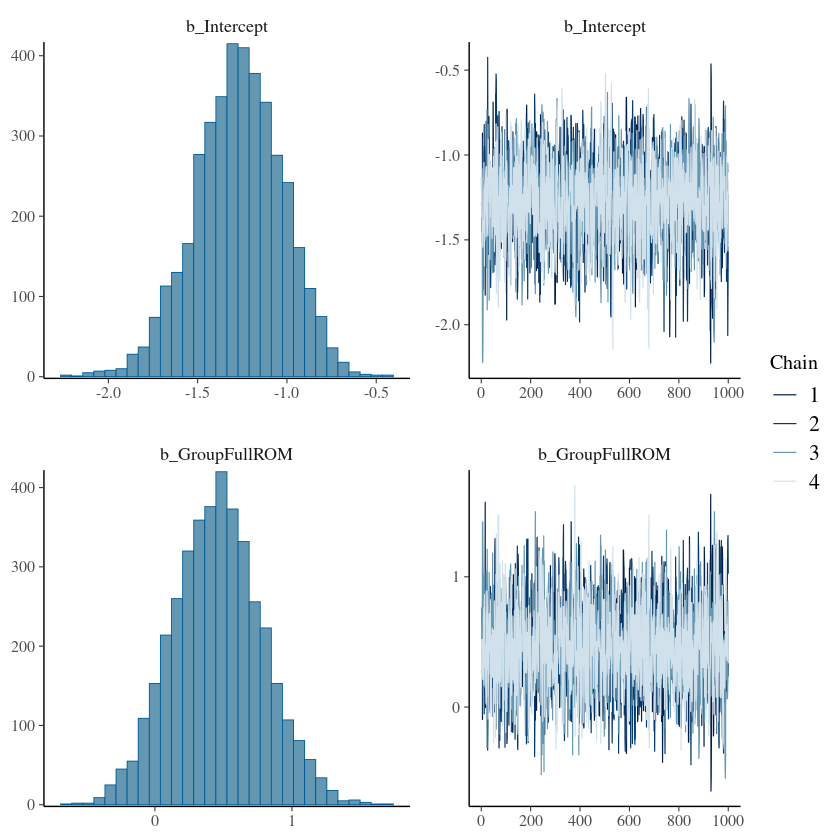

In [8]:
par(mfrow = c(2, 2))
plot(model_logistic)


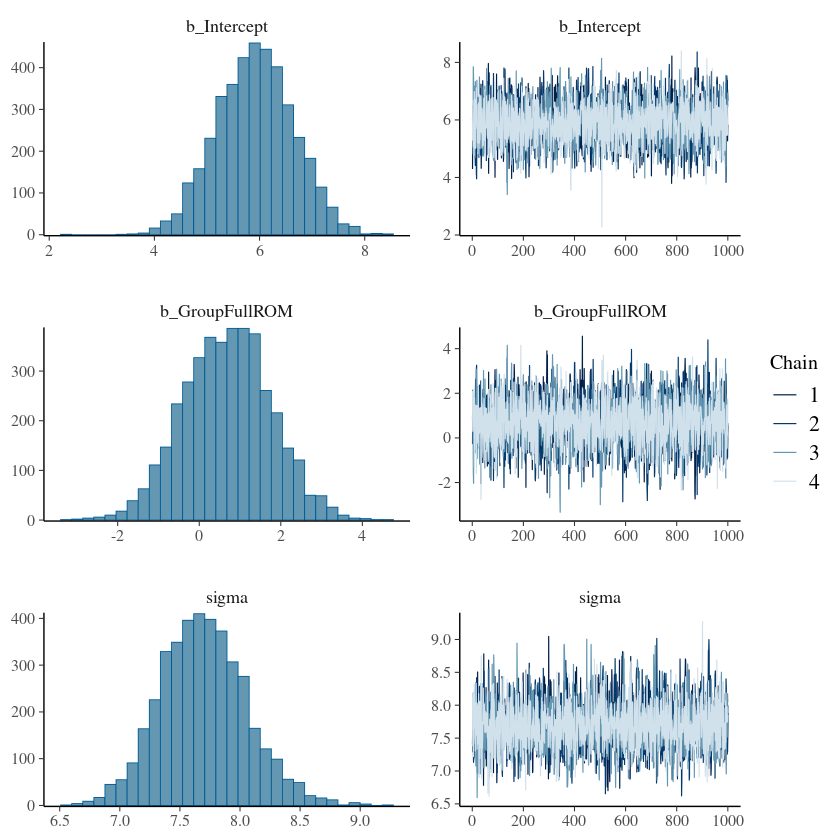

In [9]:
plot(model_linear)

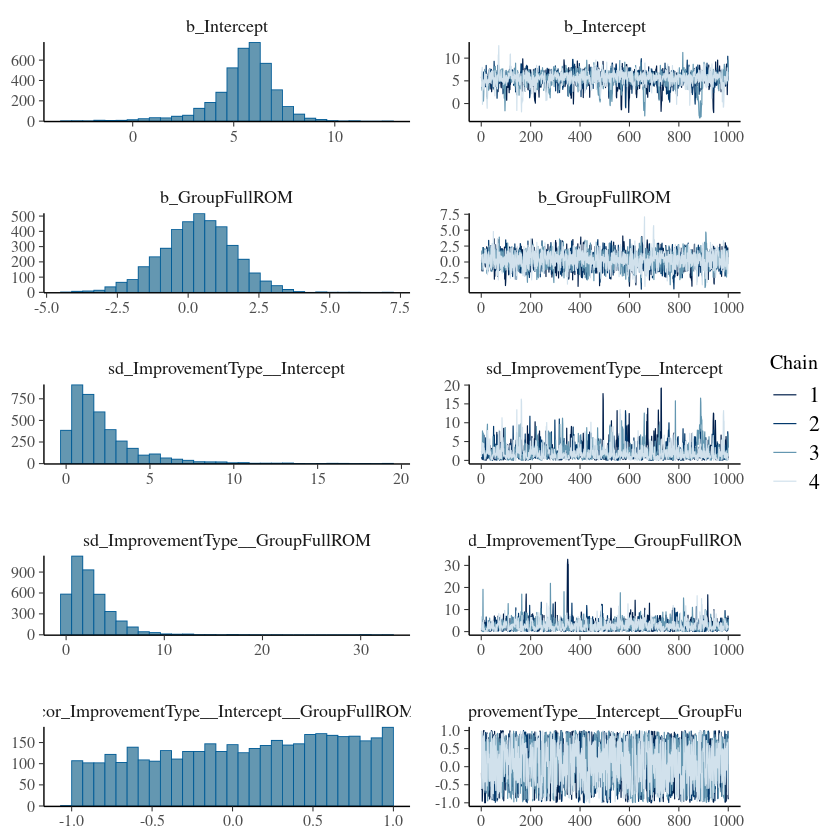

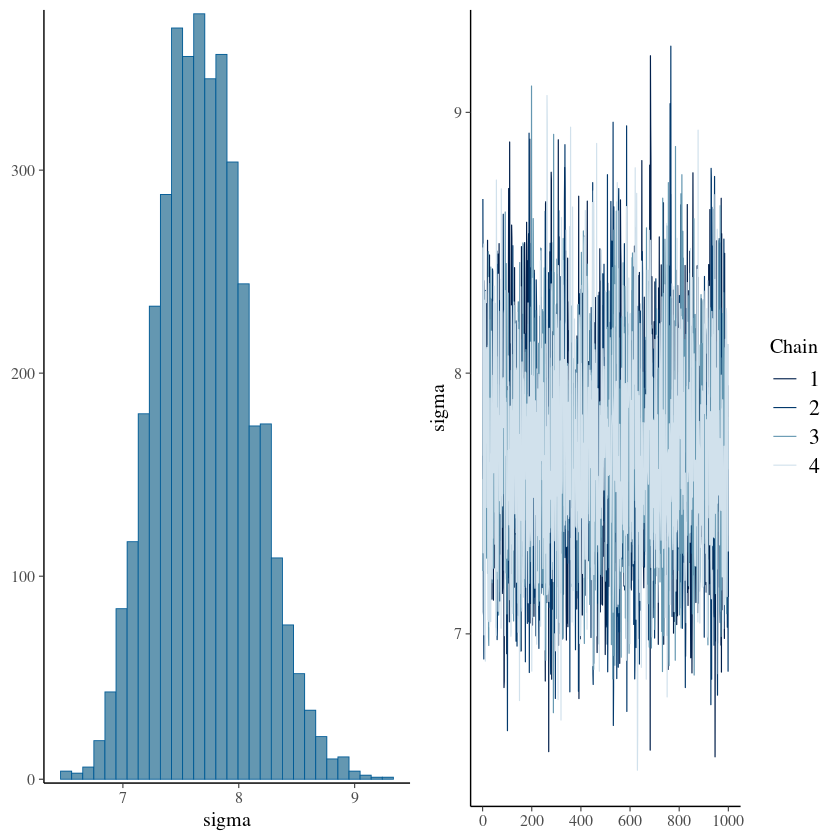

In [10]:
plot(model_hierarchical)
par(mfrow = c(1, 1))

Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”


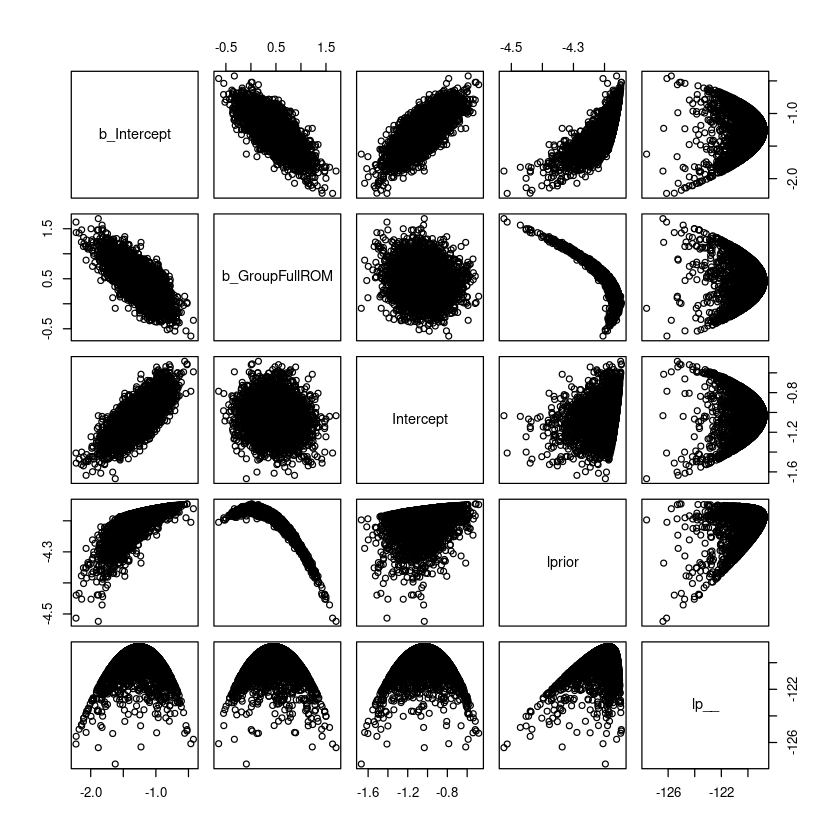

In [11]:
# Extract posterior samples for each model
posterior_logistic <- posterior_samples(model_logistic)
posterior_hierarchical <- posterior_samples(model_hierarchical)
posterior_linear <- posterior_samples(model_linear)

plot(posterior_logistic)


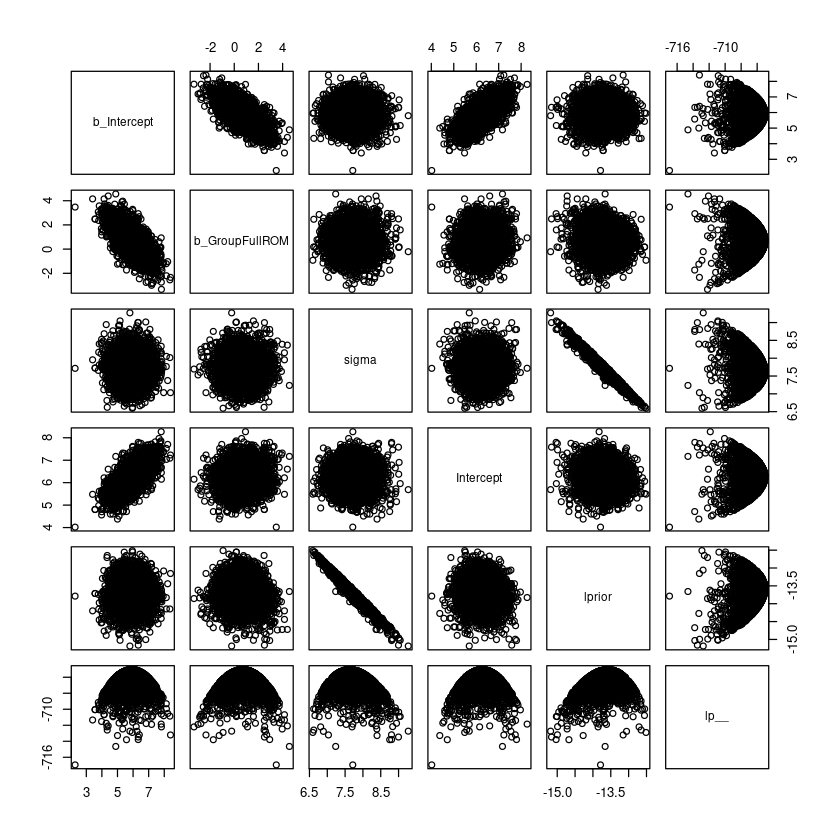

In [12]:
plot(posterior_linear)

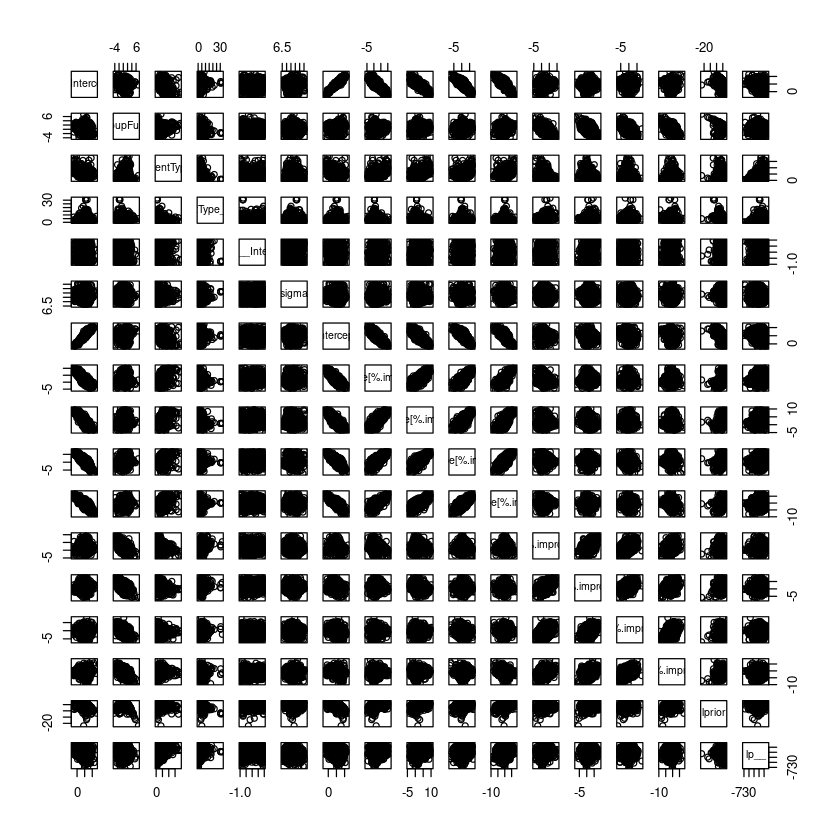

In [13]:
plot(posterior_hierarchical)

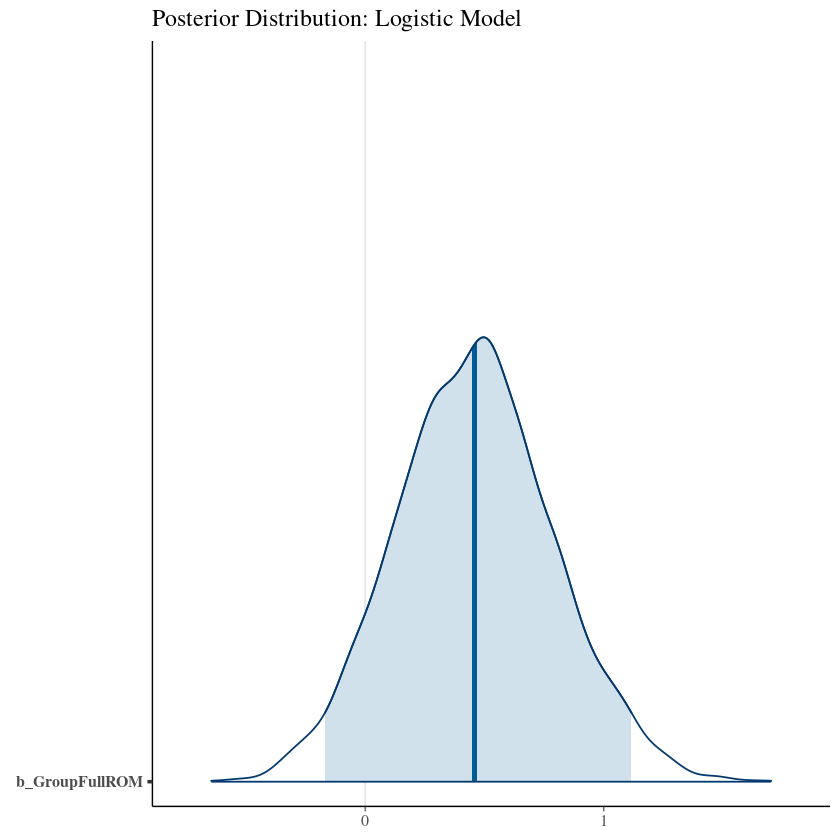

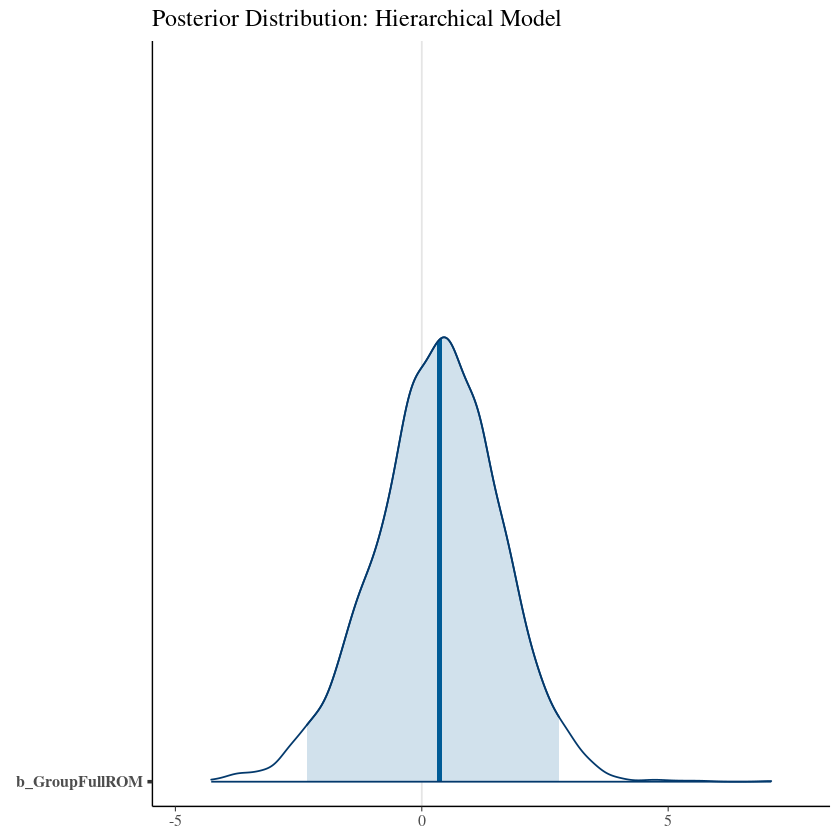

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


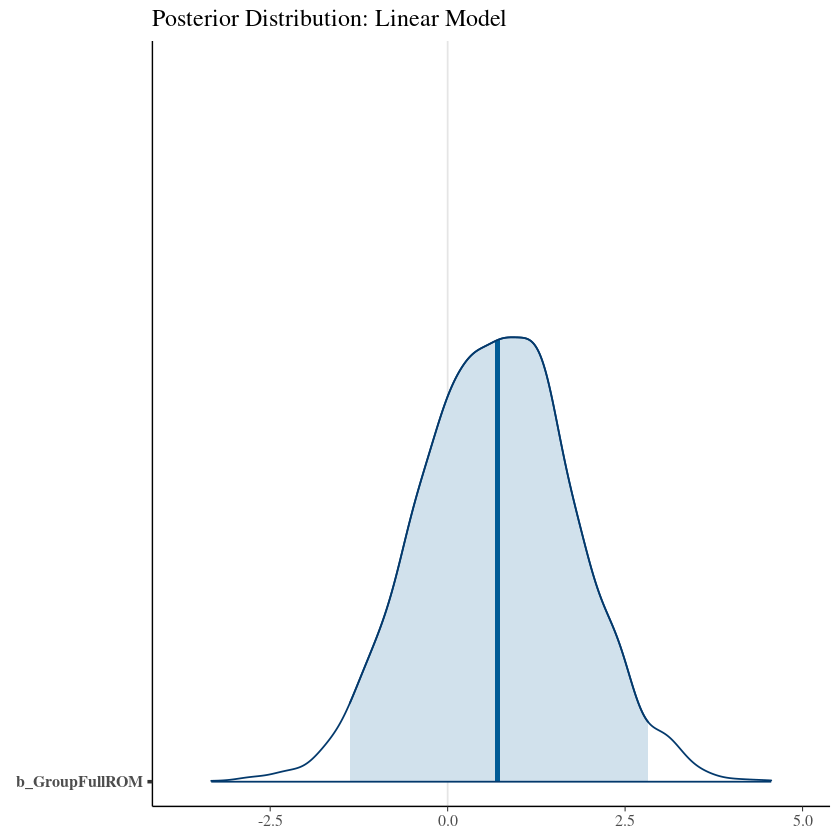

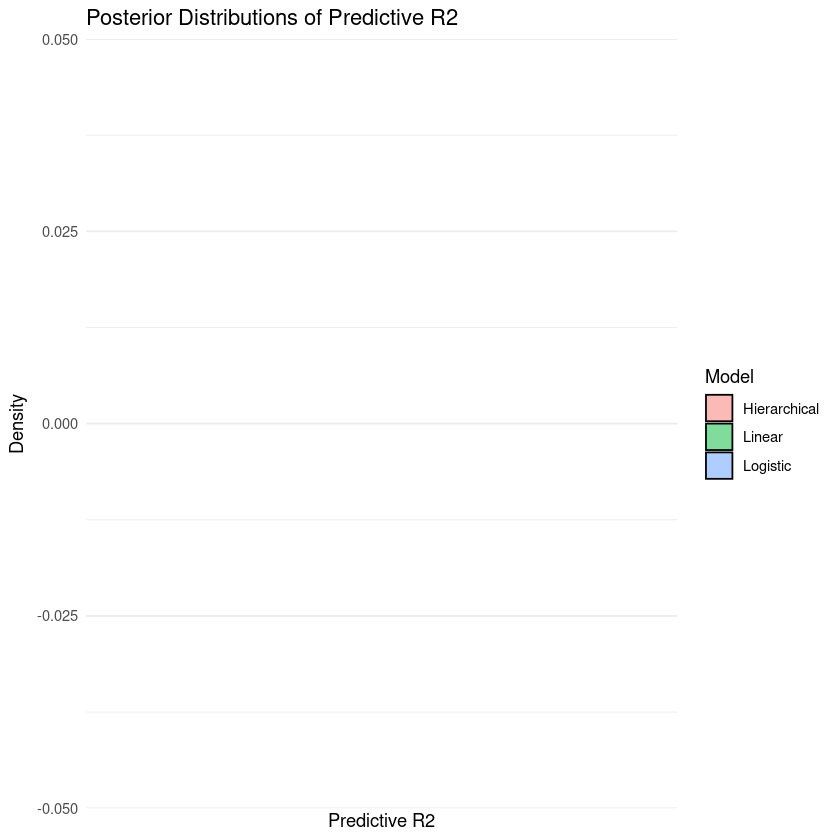

In [14]:
# Plot posterior distributions for a key parameter (e.g., b_GroupFullROM)
mcmc_areas(
  posterior_logistic, pars = "b_GroupFullROM", prob = 0.95
) + ggtitle("Posterior Distribution: Logistic Model")

mcmc_areas(
  posterior_hierarchical, pars = "b_GroupFullROM", prob = 0.95
) + ggtitle("Posterior Distribution: Hierarchical Model")

mcmc_areas(
  posterior_linear, pars = "b_GroupFullROM", prob = 0.95
) + ggtitle("Posterior Distribution: Linear Model")




# Compute predictive R2 for each model
r2_logistic <- bayes_R2(model_logistic)
r2_hierarchical <- bayes_R2(model_hierarchical)
r2_linear <- bayes_R2(model_linear)

# Extract posterior draws of R2 as data frames
r2_logistic_draws <- as.data.frame(r2_logistic)
r2_hierarchical_draws <- as.data.frame(r2_hierarchical)
r2_linear_draws <- as.data.frame(r2_linear)

# Combine the R2 distributions for comparison
r2_combined <- rbind(
  data.frame(Model = "Logistic", R2 = r2_logistic_draws$Estimate),
  data.frame(Model = "Hierarchical", R2 = r2_hierarchical_draws$Estimate),
  data.frame(Model = "Linear", R2 = r2_linear_draws$Estimate)
)

# Plot posterior distributions of R2 for comparison
library(ggplot2)

ggplot(r2_combined, aes(x = R2, fill = Model)) +
  geom_density(alpha = 0.5) +
  labs(title = "Posterior Distributions of Predictive R2",
       x = "Predictive R2", y = "Density") +
  theme_minimal()

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


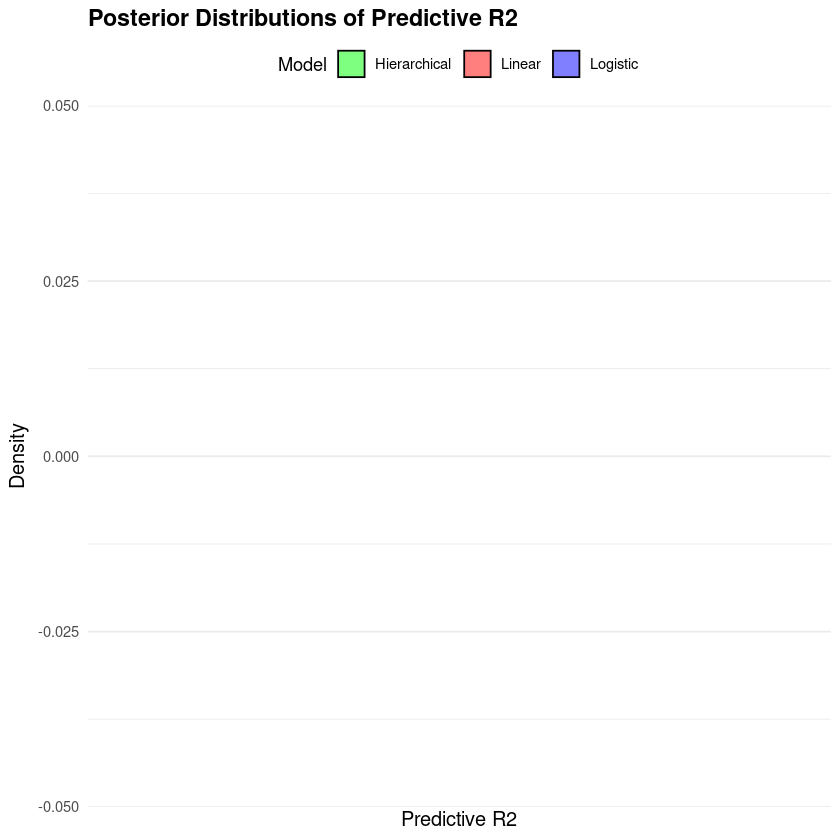

In [15]:
# Compute predictive R2 for each model
r2_logistic <- bayes_R2(model_logistic)
r2_hierarchical <- bayes_R2(model_hierarchical)
r2_linear <- bayes_R2(model_linear)

# Extract posterior draws of R2 as data frames
r2_logistic_draws <- as.data.frame(r2_logistic)
r2_hierarchical_draws <- as.data.frame(r2_hierarchical)
r2_linear_draws <- as.data.frame(r2_linear)

# Combine the R2 distributions for comparison
r2_combined <- rbind(
  data.frame(Model = "Logistic", R2 = r2_logistic_draws$Estimate),
  data.frame(Model = "Hierarchical", R2 = r2_hierarchical_draws$Estimate),
  data.frame(Model = "Linear", R2 = r2_linear_draws$Estimate)
)

# Ensure R2 is numeric (sometimes formatting issues arise)
r2_combined$R2 <- as.numeric(r2_combined$R2)

# Check for any missing or incorrect values
if (any(is.na(r2_combined$R2))) {
  stop("There are missing values in the R2 data. Check the models and data preparation.")
}

# Plot posterior distributions of R2 for comparison
library(ggplot2)

ggplot(r2_combined, aes(x = R2, fill = Model)) +
  geom_density(alpha = 0.5) +
  labs(
    title = "Posterior Distributions of Predictive R2",
    x = "Predictive R2",
    y = "Density",
    fill = "Model"
  ) +
  scale_fill_manual(values = c("Logistic" = "blue", 
                               "Hierarchical" = "green", 
                               "Linear" = "red")) +
  theme_minimal() +
  theme(
    legend.position = "top",
    plot.title = element_text(size = 14, face = "bold"),
    axis.title = element_text(size = 12)
  )
